In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**(Problem 1)**
Use simpsons rule to approximate values of $\pi$ using the integral 
$$\frac{\pi}{2}=\int_{-1}^{1}\sqrt{1-x^2}dx$$
Show results for $\Delta x = 1$, $\frac{1}{2}$, $\frac{1}{4}$, $\frac{1}{8}$.
Comment on Results.


In [2]:
def pi_simpson_int(a,b,N,f):
    n_int = int(2*N)
    exes = np.linspace(a,b,n_int+1)
    effs = f(exes)
    dx = (b-a)/n_int
    return (dx/3)* (effs[0]+effs[n_int]+2*np.sum(effs[2:n_int-1:2]) +4* np.sum(effs[1:n_int:2]))

In [3]:
func = lambda x: np.sqrt(1-x**2)

For $\Delta x  = 1$
$$\Delta x  = \frac{b-a}{n}$$
$$n = \frac{b-a}{\Delta x}$$
But since the code multiplies the value by 2, we take half of n:
$$N = \frac{n}{2} $$
$$n = \frac{1--1}{1}=2$$
$$N = \frac{2}{2} = 1$$

In [4]:
dx_1 = 2* pi_simpson_int(-1,1,1,func)
print("pi= %1.5f" %dx_1)

pi= 2.66667


For $\Delta x  = \frac{1}{2}$
$$n = \frac{1--1}{\frac{1}{2}}= 4$$
$$N =2$$

In [5]:
dx_2 = 2* pi_simpson_int(-1,1,2,func)
print("pi = %1.5f" %dx_2)

pi = 2.97607


For $\Delta x  = \frac{1}{4}$
$$n = \frac{1--1}{\frac{1}{4}}= 8$$
$$N =4$$

In [6]:
dx_3 = 2* pi_simpson_int(-1,1,4,func)
print("pi = %1.5f" %dx_3)

pi = 3.08360


For $\Delta x  = \frac{1}{8}$
$$n = \frac{1--1}{\frac{1}{8}}= 16$$
$$N =8$$

In [7]:
dx_4 = 2* pi_simpson_int(-1,1,8,func)
print("pi = %1.5f" %dx_4)

pi = 3.12119


**Comment:**
As the number of intervals increases (the size of the intervals decreases) the approximation to pi gets closer to the actual value.

**(Problem 2A)**
Write a code to graph the following function on the interval $[-1,4]$:
$$y(x) = \begin{cases}
0 & \textrm{for} & x<0 \\
x & \textrm{for} & 0\leq x \leq 1 \\
2-x & \textrm{for} & 1<x\leq2 \\
0 & \textrm{for} & x>2 \\
\end{cases}$$

In [8]:
def finn(x):
    if x<0:
        return 0
    elif x<=1:
        return x
    elif x<=2:
        return 2-x
    else:
        return 0

**(Problem 2B)**
Create 11 points from -1 to 4 and assign it to x, using this x value, plot y(x)

Text(0, 0.5, '$y(x)$')

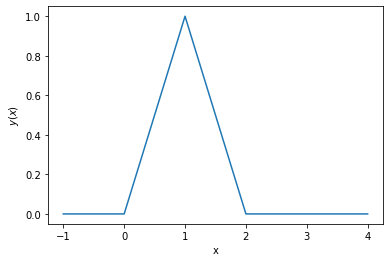

In [9]:
x = np.linspace(-1,4,11)
whys = [finn(k) for k in x]
plt.plot(x,whys)
plt.xlabel('x')
plt.ylabel('$y(x)$')

**(Probelm 2C)** Create 1e1 points from -1 to 4 and assign it x. Using this x value, plot y(x)

Text(0, 0.5, '$y(x)$')

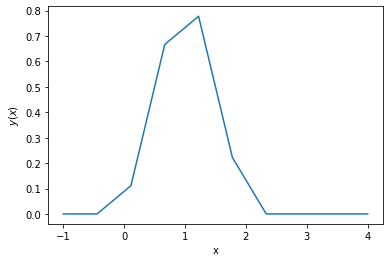

In [10]:
x = np.linspace(-1,4,int(1e1))
whys = [finn(k) for k in x]
plt.plot(x,whys)
plt.xlabel('x')
plt.ylabel('$y(x)$')

**(Problem 2D)**
Create 1e5 points from -1 to 4 and assign it to x. Using this value x value, plot y(x)

Text(0, 0.5, '$y(x)$')

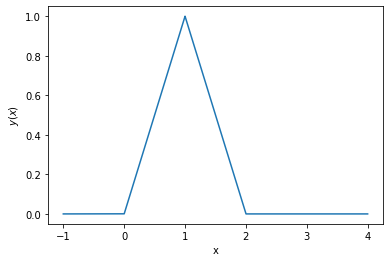

In [11]:
x = np.linspace(-1,4,int(1e5))
whys = [finn(k) for k in x]
plt.plot(x,whys)
plt.xlabel('x')
plt.ylabel('$y(x)$')

**(Problem 2e)**
Compare your plots. Discuss observations.

Plots 2B and 2D look the same, despite 2D having more points. 2B works because the x values in the array include the x values at the transition points described in the function (x = 0, x = 1, x= 2). 2C looks jagged because the x values in the array do not include the values at the transition points, x = 0, x=1, x=2.

**(Problem 3)**
Write a program that uses the bisection method to solve the nonlinear equation 
$$x = e^{-x}$$
Use your own initial interval.

$$\begin{aligned}
x & = e^{-x} \\
0 & = e^{-x}-x
\end{aligned}$$

In [12]:
def bisection(a,b,f,tol):
    fa = f(a)
    fb = f(b)
    if fa*fb<0:
        c = (a+b)/2.
        see_guesses = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c
            else:
                a = c
            c = (a+b)/2.
            capproxs = np.append(see_guesses,c)
            fc = f(c)
     
        print("x= %1.15f" %c)
    else:
        print("A root cannot be found in this interval")

In [13]:
func = lambda x: np.exp(-x)-x

In [14]:
bisection(0,2,func,1e-5)

x= 0.567138671875000


**(Problem 4)**
$$F = \frac{A}{\int_0^{T_1}c(t)dt + \int_{T_1}^{T_2}m(t)dt}$$
Where $A  = 5$, $T_1 = \frac{\pi}{4}$, $T_2 = \frac{\pi}{2}$
$$c(t) = \cos(t) -\sin(t)$$
$$m(t) = \sin(t)-\cos(t)$$

**(Problem 4A)** Use the Trapezoid method to compute the denominator of the above formula and then compute F.

In [15]:
def trapezoid(a,b,N,f):
    n_int = int(N) 
    exes = np.linspace(a,b,n_int+1)
    effs = f(exes)
    dx = (b-a)/N
    return dx/2.*(effs[0] + effs[n_int] + 2.*np.sum(effs[1:n_int]))

In [16]:
see  = lambda t: np.cos(t) - np.sin(t)
emm  = lambda t: np.sin(t) - np.cos(t)
T1 = np.pi/4
T2 = np.pi/2

In [17]:
denominator_trap = trapezoid(0,T1,1e3,see) + trapezoid(T1,T2,1e3,emm)
F_trap = 5/denominator_trap
print(F_trap)

6.0355342161844865


**(Problem 4B)** Use the Simpson's method to compute the denominator of the above formula and then compute F.

In [18]:
def simpson(a,b,N,f):
    n_int = int(2*N)
    exes = np.linspace(a,b,n_int+1)
    effs = f(exes)
    dx = (b-a)/n_int
    return (dx/3)* (effs[0]+effs[n_int]+2*np.sum(effs[2:n_int-1:2]) +4* np.sum(effs[1:n_int:2]))

In [19]:
denominator_simp= simpson(0,T1,1e3,see) + simpson(T1,T2,1e3,emm)
F_simp = 5/denominator_simp
print(F_simp)

6.035533905932736


**(Problem 5)** The Hermite Polynomials $H_n(x)$ are such that $H_0(x) = 1$, $H_1(x) =2x$ and for $n\geq 2 $,$H_n(x)$  satisfies the recurrence relationship
$$H_n(x) = 2x H_{n-1}(x)-2(n-1)H_{n-2}(x), n\geq2$$

**(Problem 5A)**
Write  resusrive program to find any Hermite polynomial $H_n(x)$.

In [20]:
def hermite(x,n):
    H0 = 1
    H1 = 2*x

    if n == 0:
        return H0
    elif n == 1:
        return H1
    else:
        Hn1 = H1
        Hn2 = H0
        for k in range (2,n+1):
            Hn = (2*x*Hn1) - (2*(n-1)*Hn2)
            Hn2 = Hn1
            Hn1 = Hn
        return Hn

**(Problem 5B)** Generate a plot of the first six Hermite polynomials on the interval $-2\leq x \leq 2$

Text(0.5, 1.0, 'Hermite Polynomials')

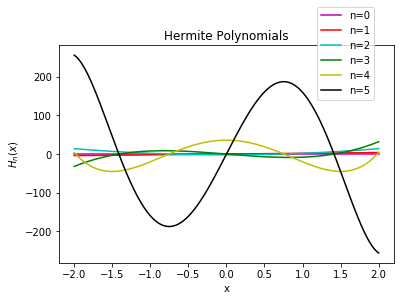

In [21]:
exes = np.linspace(-2,2,int(1e3))

whys0 = [hermite(i,0) for i in exes]
plt.plot(exes,whys0, label = 'n=0', c = 'm')

whys1 =  [hermite(i,1) for i in exes]
plt.plot(exes,whys1, label = 'n=1', c = 'r')

whys2 =  [hermite(i,2) for i in exes]
plt.plot(exes,whys2, label = 'n=2', c = 'c')

whys3 =  [hermite(i,3) for i in exes]
plt.plot(exes,whys3, label = 'n=3', c = 'g')

whys4 =  [hermite(i,4) for i in exes]
plt.plot(exes,whys4, label = 'n=4', c = 'y')

whys5 =  [hermite(i,5) for i in exes]
plt.plot(exes,whys5, label = 'n=5', c = 'k')

plt.xlabel('x')
plt.ylabel('$H_n(x)$')
plt.legend(loc=(.77,.75))
plt.title('Hermite Polynomials')

**(Problem 6A)**
Compute a root of the function
$$f(x)=x^2-2$$ using the secant method with inital guess $x_0 = 1.5$ and $x_1 = 1$ 

In [22]:
def secant(x0,x1,f,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    while np.abs(f1) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
    
    print("A root is x = %1.5f" %x2)

In [23]:
func = lambda x: x**2 - 2

In [24]:
secant(1.5,1,func,1e-5)

A root is x = 1.41421


**(Problem 6B)** Choose a different initial guess and compute another root of $f(x)$

In [25]:
secant(-1.5,0,func,1e-5)

A root is x = -1.41421


**(Problem 7)**
Here is a cubic polynomial with three closely spaced real roots:
$$p(x) = 580x^4-2320x^3-1160x^2+6960x-1740$$

**(Problem 7)**
Here is a  polynomial with three closely spaced real roots:
$$p(x) = 580x^4-2320x^3-1160x^2+6960x-1740$$

**(Problem 7A)** What are the exact roots of $p(x)$?

We begin by factoring the polynomial:
$$\begin{aligned}
p(x)&= 580x^4-2320x^3-1160x^2+6960x-1740\\
& = 580(x^4-4x^3-2x^2+12x-3) \\
& = 580 \big( (x^4-2x^2-3)+(-4x^3+12x)\big)\\
& = 580 \big( (x^2-3)(x^2+1)-4x(x^2-3)\big)\\
& = 580 (x^2-3)(x^2-4x+1)\\
\end{aligned}$$

To find the roots, we must set the polynomial equal to zero:
$$\begin{aligned}
0&= 580x^4-2320x^3-1160x^2+6960x-1740\\
& = 580 (x^2-3)(x^2-4x+1)\\
& =(x^2-3)(x^2-4x+1)\\
\end{aligned}$$

Then, our roots are:
$$\begin{aligned}
0&=(x^2-3)\\
3 &= x^2 \\
\pm\sqrt{3} &= x
\end{aligned}$$
And,
$$\begin{aligned}
0&=(x^2-4x+1)\\
x&= \frac{4\pm\sqrt{16-4(1)(1)}}{2}\\
x&= 2\pm\sqrt{3}
\end{aligned}$$

In [26]:
np.sqrt(3)

1.7320508075688772

In [27]:
2+np.sqrt(3)

3.732050807568877

In [28]:
2-np.sqrt(3)

0.2679491924311228

Then, the three closely spaced roots are $x = -\sqrt{3},2-2\sqrt{3}, \sqrt{3}$

**(Problem 7B)**
Plot $p(x)$ for $-2\leq x \leq 4$. And plot the location of the four roots on the graph.

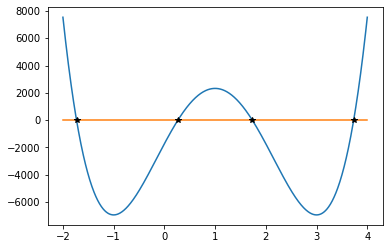

In [29]:
poly = lambda x: 580*x**4 -2320*x**3-1160*x**2 +6960*x-1740
exes = np.linspace(-2,4,int(1e3))
whys = [poly(k) for k in exes]
whys0 = np.zeros(exes.size)
plt.plot(exes,whys)
plt.plot(exes,whys0)
xzeroes = [-np.sqrt(3),2-np.sqrt(3),2+np.sqrt(3),np.sqrt(3)]
yzeroes = [0,0,0,0]
plt.plot(xzeroes,yzeroes,'*', c = 'k')

**(Problem 7C)**
Starting with $x_0 = 2$, what does Newton's method do?

In [30]:
def newton(f,df,x0,tol):
    x1 = x0 - f(x0)/df(x0)
    
    while np.abs(x1-x0)>=tol:
        x0 = x1
        x1 = x0 - f(x0)/df(x0)
    print("A root is x= %1.15f" %x1)
    
    
dpoly = lambda x: 4*580*x**3 - 3*2320*x**2-2*(1160)*x +6960

newton(poly,dpoly,2,1e-5)

A root is x= 1.732050807568877


Newton's Method starts at $x=2$ and relies on the first order linear approximation. Starting with $x=2$, Newton's method determines the tangent line at that x-value, then extrapolates the x-intercept of that tangent line. The new tangent line is determined for the x-value at that new intercept. This is done until it converges to a root. For this value, we have found the root $x=1.732$.

**(Problem 7D)**
Starting with $x_0 = 0.3$ and $x_1 = 0.9$, what does the secant method do?

In [31]:
secant(0.3,0.9,poly,1e-3)

A root is x = 0.26795


The Secant Method takes two input guesses and uses an iterative process to find the root closest to $x = 0.3$ and $x = 0.9$.

**(Problem 7E)** Starting with the interval $[0.5,2.9]$, what does the bisection method do?

In [32]:
bisection(0.5,2.9,poly,1e-5)

x= 1.732050806283951


The bisection method finds the root that is in between $x= 0.5$ and $x = 2.9$. The bisection method found the root $x = 1.732$.